In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels.formula.api as smf
import scipy.stats as st
import seaborn


In [2]:
import os, sys, pandas, numpy ,patsy , re, random ,scipy,statsmodels
# random.seed(2016) # Fixation du seed
# -*- coding: utf-8 -*- # fixation de l’encodage
pd.set_option('expand_frame_repr', False) # augmente le nombre de variable par page en faisant print(notes)
pd.set_option('display.max_columns', 100) # Fixe le nombre de colonnes à aficher à 1000
pd.set_option('display.max_row', 1000) # Augmente le nombre de lignes à afficher
# os.chdir("D: /R applications/data" ) # fixation répertoire de travail


### Lecture des fichiers import CSV

In [3]:
#  'notes' contient 170 billets avec leur caractéristiques

notes = pd.read_csv("notes.csv")
notes.head(5)

# is_genuine  diagonal    height_left  height_right    margin_low  margin_up    length

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [4]:
# billets = notes.copy()
# billets["margins"] = billets["margin_low"] + billets["margin_up"]
# billets["height_w_margins"] = billets["height_right"] + billets["margins"]
# billets.describe()
# billets

In [5]:
# 10% des billets de plus grande et plus petite longueur
# 10% des billets de plus grande et plus petite marge
# 10% des billets de plus grande et plus petite hauteur                --> VOIR  projet6-bis
# 10% des billets de plus grande et plus petite diagonale

In [6]:
#   Code à activer pour afficher 5 billets à tester (du fichier example.csv) sur le 1er plan factoriel.

# X_example = pd.read_csv("example.csv")                 # "example.csv" :  fichier avec 5 billets à évaluer
# X_example.drop('id', axis=1, inplace=True)             # delete la colonne 'id' qui gêne
# ser = pd.Series([2, 2, 2, 2, 2], name = 'is_genuine')  # '2' pour reconnaître ces 5 billets
# X_example['is_genuine'] = ser
# notes = pd.concat([notes, X_example])

In [7]:
# nombre d'observations -> 170
n = notes.shape[0]
# print(n)

# nombre de variables -> 7, en fait 6
p = notes.shape[1]
# print(p)

### Nettoyage :  doublon, outlier, valeur manquante

In [8]:
# doublon
print(len(notes))
notes.duplicated(keep="first")
print(len(notes))

# valeur manquante
notes.dropna()
print(len(notes))

# outlier :  Le Min et le Max sont une indication
notes.describe()

# l'écart-type (std), les valeurs minimales et maximales sont cohérentes par rapport aux données décrites 
#    et ne révèle pas de valeur abbérante. 
# Il n'y a ni doublon, ni valeur manquante.  Le dataset est propre.

170
170
170


,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


## Analyse Bivariée et Univariée

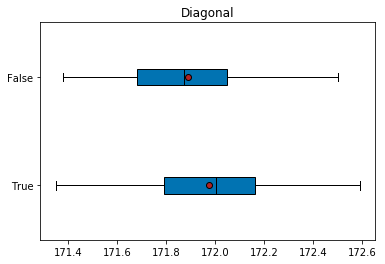

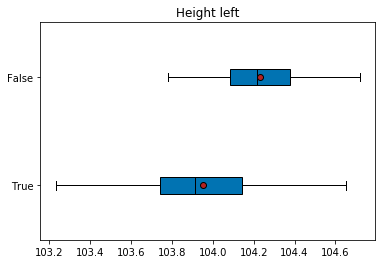

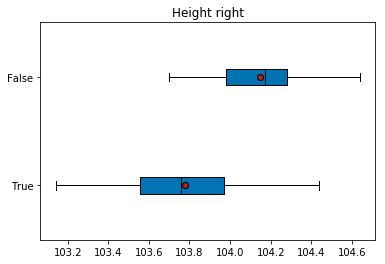

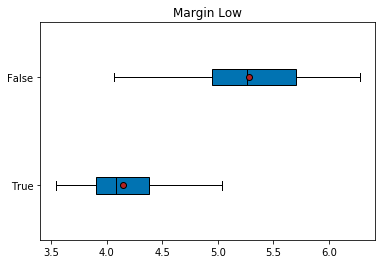

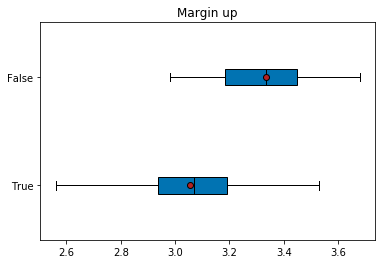

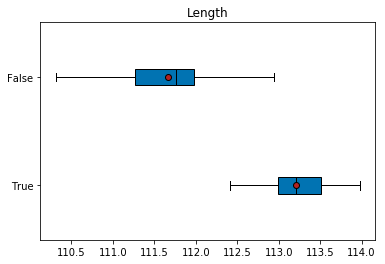

In [9]:
# qualitative
X  = "is_genuine" 

# quantitative
Y1 = "diagonal"   
Y2 = "height_left"
Y3 = "height_right"
Y4 = "margin_low"
Y5 = "margin_up"
Y6 = "length"

# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

modalites = notes[X].unique()
groupes = []

for m in modalites:
    groupes.append(notes[notes[X]==m][Y1])
plt.title("Diagonal")
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

del groupes[:]
for m in modalites:
    groupes.append(notes[notes[X]==m][Y2])
plt.title("Height left")
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

del groupes[:]
for m in modalites:
    groupes.append(notes[notes[X]==m][Y3])
plt.title("Height right")
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

del groupes[:]
for m in modalites:
    groupes.append(notes[notes[X]==m][Y4])
plt.title("Margin Low")
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

del groupes[:]
for m in modalites:
    groupes.append(notes[notes[X]==m][Y5])
plt.title("Margin up")
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

del groupes[:]
for m in modalites:
    groupes.append(notes[notes[X]==m][Y6])
plt.title("Length")
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

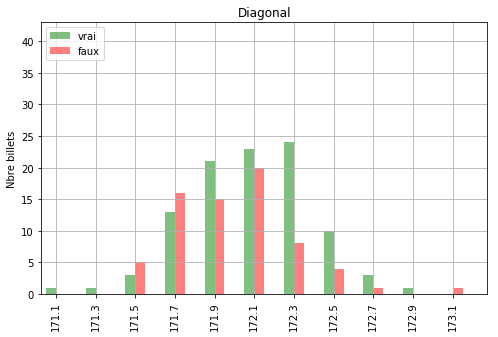

In [10]:
taille_classe = 0.2   # taille des classes pour la discrétisation de 'diagonal' , histoire d'avoir 10 classes

billets = notes.copy()
billets["vrai"] = 0
billets["faux"] = 0
billets.loc[billets['is_genuine'] == 1, 'vrai'] = 1
billets.loc[billets['is_genuine'] == 0, 'faux'] = 1

# on calcule des tranches allant de 171 à la valeur maximum par paliers de taille 'taille_classe'
tranches = np.arange(171, max(billets["diagonal"]), taille_classe)
tranches += taille_classe/2                            # décale les tranches d'une demi taille de classe
indices = np.digitize(billets["diagonal"], tranches)   # associe à chaque 'diagonal' son numéro de classe

billets["classe"] = indices

billets = billets.groupby(['classe']).sum().reset_index()

pos = list(range(len(billets['is_genuine'])))
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar with 'vrai' data, in position pos,
plt.bar(pos, billets['vrai'], width, alpha=0.5, color='green', label=billets['vrai'][0])
# Create a bar with 'faux' data, in position pos + some width buffer,
plt.bar([p + width for p in pos], billets['faux'], width, alpha=0.5, color='red', label=billets['faux'][0]) 

# Set the y axis label
ax.set_ylabel('Nbre billets')
# Set the chart's title
ax.set_title('Diagonal')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
labels = ["{0:.1f}".format(x) for x in tranches]
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(billets['vrai'] + billets['faux'])] )

# Adding the legend and showing the plot
plt.legend(['vrai', 'faux'], loc='upper left')
plt.grid()
plt.xticks(rotation = 'vertical')
plt.show()

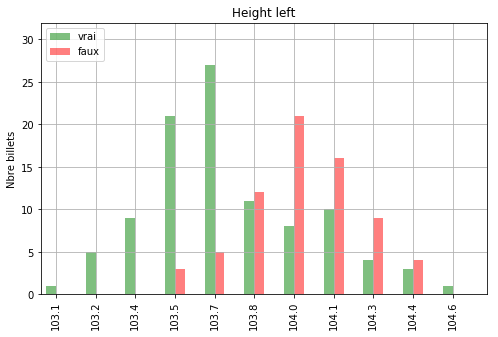

In [11]:
taille_classe = 0.15   # taille des classes pour la discrétisation de 'height_left' , histoire d'avoir 10 classes

billets = notes.copy()
billets["vrai"] = 0
billets["faux"] = 0
billets.loc[billets['is_genuine'] == 1, 'vrai'] = 1
billets.loc[billets['is_genuine'] == 0, 'faux'] = 1

# on calcule des tranches allant de 103 à la valeur maximum par paliers de taille 'taille_classe'
tranches = np.arange(103, max(billets["height_left"]), taille_classe)
tranches += taille_classe/2                               # décale les tranches d'une demi taille de classe
indices = np.digitize(billets["height_left"], tranches)   # associe à chaque 'height_left' son numéro de classe

billets["classe"] = indices

billets = billets.groupby(['classe']).sum().reset_index()

pos = list(range(len(billets['is_genuine'])))    # = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar with 'vrai' data, in position pos,
plt.bar(pos, billets['vrai'], width, alpha=0.5, color='green', label=billets['vrai'][0])
# Create a bar with 'faux' data,# in position pos + some width buffer,
plt.bar([p + width for p in pos], billets['faux'], width, alpha=0.5, color='red', label=billets['faux'][0]) 

# Set the y axis label
ax.set_ylabel('Nbre billets')
# Set the chart's title
ax.set_title('Height left')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
labels = ["{0:.1f}".format(x) for x in tranches]
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(billets['vrai'] + billets['faux'])] )

# Adding the legend and showing the plot
plt.legend(['vrai', 'faux'], loc='upper left')
plt.grid()
plt.xticks(rotation = 'vertical')
plt.show()

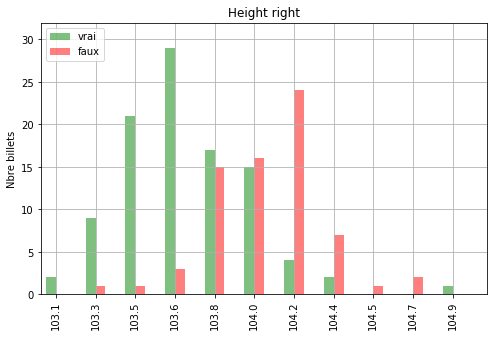

In [12]:
taille_classe = 0.18   # taille des classes pour la discrétisation de 'height_right' , histoire d'avoir 10 classes

billets = notes.copy()
billets["vrai"] = 0
billets["faux"] = 0
billets.loc[billets['is_genuine'] == 1, 'vrai'] = 1
billets.loc[billets['is_genuine'] == 0, 'faux'] = 1

# on calcule des tranches allant de 103 à la valeur maximum par paliers de taille 'taille_classe'
tranches = np.arange(103, max(billets["height_right"]), taille_classe)
tranches += taille_classe/2                                # décale les tranches d'une demi taille de classe
indices = np.digitize(billets["height_right"], tranches)   # associe à chaque 'height_right' son numéro de classe

billets["classe"] = indices

billets = billets.groupby(['classe']).sum().reset_index()

pos = list(range(len(billets['is_genuine'])))    # = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar with 'vrai' data, in position pos,
plt.bar(pos, billets['vrai'], width, alpha=0.5, color='green', label=billets['vrai'][0])
# Create a bar with 'faux' data,# in position pos + some width buffer,
plt.bar([p + width for p in pos], billets['faux'], width, alpha=0.5, color='red', label=billets['faux'][0]) 

# Set the y axis label
ax.set_ylabel('Nbre billets')
# Set the chart's title
ax.set_title('Height right')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
labels = ["{0:.1f}".format(x) for x in tranches]
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(billets['vrai'] + billets['faux'])] )

# Adding the legend and showing the plot
plt.legend(['vrai', 'faux'], loc='upper left')
plt.grid()
plt.xticks(rotation = 'vertical')
plt.show()

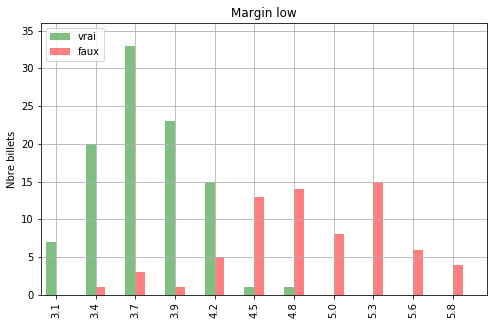

In [13]:
taille_classe = 0.27   # taille des classes pour la discrétisation de 'margin_low' , histoire d'avoir 10 classes

billets = notes.copy()
billets["vrai"] = 0
billets["faux"] = 0
billets.loc[billets['is_genuine'] == 1, 'vrai'] = 1
billets.loc[billets['is_genuine'] == 0, 'faux'] = 1

# on calcule des tranches allant de 3 à la valeur maximum par paliers de taille 'taille_classe'
tranches = np.arange(3, max(billets["margin_low"]), taille_classe)
tranches += taille_classe/2                              # décale les tranches d'une demi taille de classe
indices = np.digitize(billets["margin_low"], tranches)   # associe à chaque 'margin_low' son numéro de classe

billets["classe"] = indices

billets = billets.groupby(['classe']).sum().reset_index()

pos = list(range(len(billets['is_genuine'])))    # = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar with 'vrai' data, in position pos,
plt.bar(pos, billets['vrai'], width, alpha=0.5, color='green', label=billets['vrai'][0])
# Create a bar with 'faux' data,# in position pos + some width buffer,
plt.bar([p + width for p in pos], billets['faux'], width, alpha=0.5, color='red', label=billets['faux'][0]) 

# Set the y axis label
ax.set_ylabel('Nbre billets')
# Set the chart's title
ax.set_title('Margin low')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
labels = ["{0:.1f}".format(x) for x in tranches]
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(billets['vrai'] + billets['faux'])] )

# Adding the legend and showing the plot
plt.legend(['vrai', 'faux'], loc='upper left')
plt.grid()
plt.xticks(rotation = 'vertical')
plt.show()

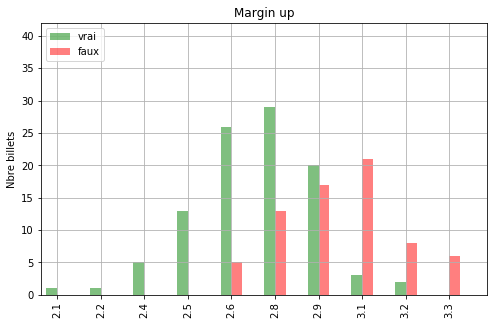

In [14]:
taille_classe = 0.14   # taille des classes pour la discrétisation de 'margin_up' , histoire d'avoir 10 classes

billets = notes.copy()
billets["vrai"] = 0
billets["faux"] = 0
billets.loc[billets['is_genuine'] == 1, 'vrai'] = 1
billets.loc[billets['is_genuine'] == 0, 'faux'] = 1

# on calcule des tranches allant de 2 à la valeur maximum par paliers de taille 'taille_classe'
tranches = np.arange(2, max(billets["margin_up"]), taille_classe)
tranches += taille_classe/2                             # décale les tranches d'une demi taille de classe
indices = np.digitize(billets["margin_up"], tranches)   # associe à chaque 'margin_up' son numéro de classe

billets["classe"] = indices

billets = billets.groupby(['classe']).sum().reset_index()

pos = list(range(len(billets['is_genuine'])))    # = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar with 'vrai' data, in position pos,
plt.bar(pos, billets['vrai'], width, alpha=0.5, color='green', label=billets['vrai'][0])
# Create a bar with 'faux' data,# in position pos + some width buffer,
plt.bar([p + width for p in pos], billets['faux'], width, alpha=0.5, color='red', label=billets['faux'][0]) 

# Set the y axis label
ax.set_ylabel('Nbre billets')
# Set the chart's title
ax.set_title('Margin up')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
labels = ["{0:.1f}".format(x) for x in tranches]
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(billets['vrai'] + billets['faux'])] )

# Adding the legend and showing the plot
plt.legend(['vrai', 'faux'], loc='upper left')
plt.grid()
plt.xticks(rotation = 'vertical')
plt.show()

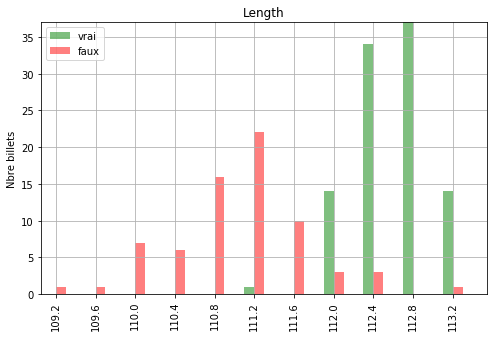

In [15]:
taille_classe = 0.4   # taille des classes pour la discrétisation de 'length' , histoire d'avoir 10 classes

billets = notes.copy()
billets["vrai"] = 0
billets["faux"] = 0
billets.loc[billets['is_genuine'] == 1, 'vrai'] = 1
billets.loc[billets['is_genuine'] == 0, 'faux'] = 1

# is_genuine  diagonal    height_left  height_right    margin_low  margin_up    length

# on calcule des tranches allant de 109 à la valeur maximum par paliers de taille 'taille_classe'
tranches = np.arange(109, max(billets["length"]), taille_classe)
tranches += taille_classe/2                            # décale les tranches d'une demi taille de classe
indices = np.digitize(billets["length"], tranches)     # associe à chaque 'length' son numéro de classe

billets["classe"] = indices

billets = billets.groupby(['classe']).sum().reset_index()

pos = list(range(len(billets['is_genuine'])))    # = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar with 'vrai' data, in position pos,
plt.bar(pos, billets['vrai'], width, alpha=0.5, color='green', label=billets['vrai'][0])
# Create a bar with 'faux' data,# in position pos + some width buffer,
plt.bar([p + width for p in pos], billets['faux'], width, alpha=0.5, color='red', label=billets['faux'][0]) 

# Set the y axis label
ax.set_ylabel('Nbre billets')
# Set the chart's title
ax.set_title('Length')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
labels = ["{0:.1f}".format(x) for x in tranches]
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(billets['vrai'] + billets['faux'])] )

# Adding the legend and showing the plot
plt.legend(['vrai', 'faux'], loc='upper left')
plt.grid()
plt.xticks(rotation = 'vertical')
plt.show()

## MESURES de TENDANCE CENTRALE

In [16]:
#    MESURES de TENDANCE CENTRALE

print("< Diagonale >")
print("  Max :  ",notes['diagonal'].max())
print("  Min :  ",notes['diagonal'].min()) 

print("\n< Hauteur à gauche >")
print("  Max :  ",notes['height_left'].max())
print("  Min :  ",notes['height_left'].min()) 

print("\n< Hauteur à droite >")
print("  Max :  ",notes['height_right'].max())
print("  Min :  ",notes['height_right'].min()) 

print("\n< Marge inférieur >")
print("  Max :  ",notes['margin_low'].max())
print("  Min :  ",notes['margin_low'].min()) 

print("\n< Marge supérieur >")
print("  Max :  ",notes['margin_up'].max())
print("  Min :  ",notes['margin_up'].min()) 

print("\n< Longueur >")
print("  Max :  ",notes['length'].max())
print("  Min :  ",notes['length'].min()) 


< Diagonale >
  Max :   173.01
  Min :   171.04

< Hauteur à gauche >
  Max :   104.86
  Min :   103.23

< Hauteur à droite >
  Max :   104.95
  Min :   103.14

< Marge inférieur >
  Max :   6.28
  Min :   3.54

< Marge supérieur >
  Max :   3.68
  Min :   2.27

< Longueur >
  Max :   113.98
  Min :   109.97


## Corrélation

In [17]:
import scipy.stats as st

# print("Coef de Pearson diagonal/height_left  = ",st.pearsonr(notes["diagonal"],notes["height_left"])[0])
# print("Coef de Pearson diagonal/height_right = ",st.pearsonr(notes["diagonal"],notes["height_right"])[0])
# print("Coef de Pearson diagonal/margin_low   = ",st.pearsonr(notes["diagonal"],notes["margin_low"])[0])
# print("Coef de Pearson diagonal/margin_up    = ",st.pearsonr(notes["diagonal"],notes["margin_up"])[0])
# print("Coef de Pearson diagonal/length       = ",st.pearsonr(notes["diagonal"],notes["length"])[0])

# print("\nCoef de Pearson height_left/height_right  = ",st.pearsonr(notes["height_left"],notes["height_right"])[0])   #   ***
# print("Coef de Pearson height_left/margin_low     = ",st.pearsonr(notes["height_left"],notes["margin_low"])[0])
# print("Coef de Pearson height_left/margin_up      = ",st.pearsonr(notes["height_left"],notes["margin_up"])[0])
# print("Coef de Pearson height_left/length         = ",st.pearsonr(notes["height_left"],notes["length"])[0])

# print("\nCoef de Pearson height_right/margin_low = ",st.pearsonr(notes["height_right"],notes["margin_low"])[0])    #    **
# print("Coef de Pearson height_right/margin_up    = ",st.pearsonr(notes["height_right"],notes["margin_up"])[0])
# print("Coef de Pearson height_right/length       = ",st.pearsonr(notes["height_right"],notes["length"])[0])

# print("\nCoef de Pearson margin_low/margin_up = ",st.pearsonr(notes["margin_low"],notes["margin_up"])[0])
# print("Coef de Pearson margin_low/length    = ",st.pearsonr(notes["margin_low"],notes["length"])[0])           #     **

# print("\nCoef de Pearson margin_up/length = ",st.pearsonr(notes["margin_up"],notes["length"])[0])          #     **

In [18]:
# Matrice des corrélations
notes.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


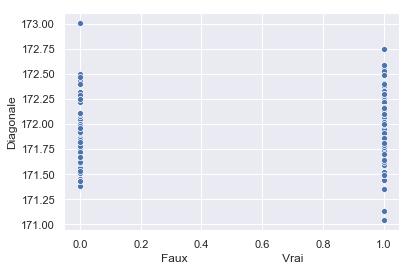

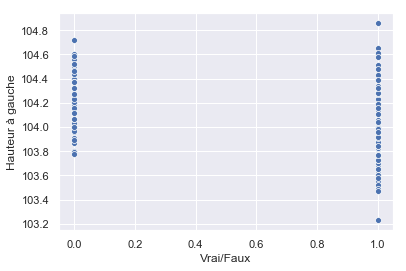

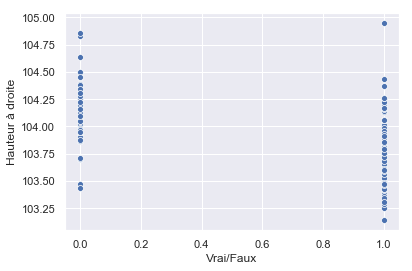

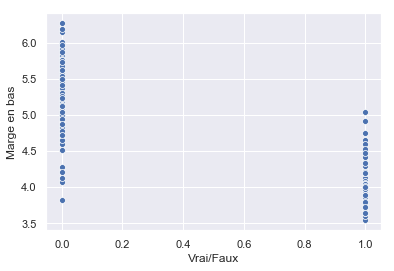

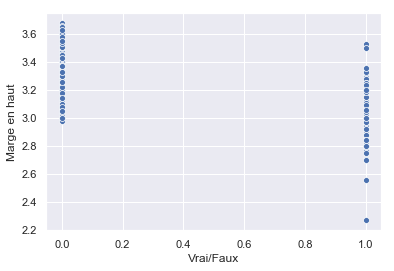

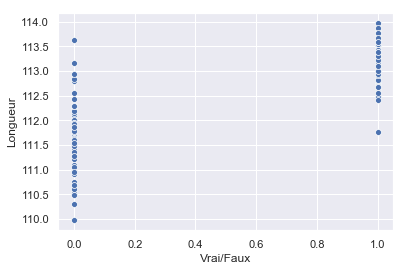

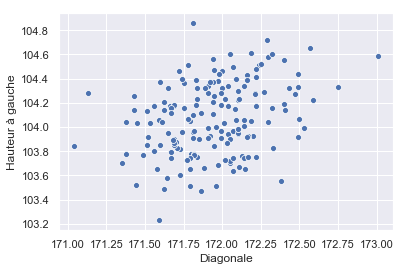

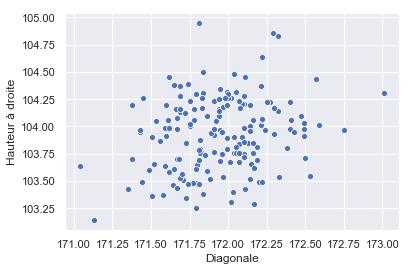

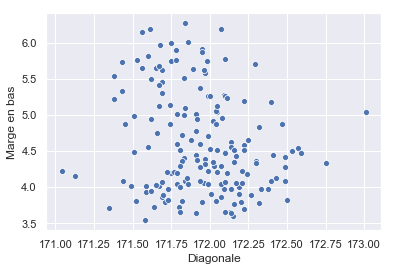

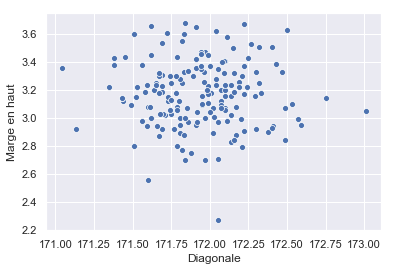

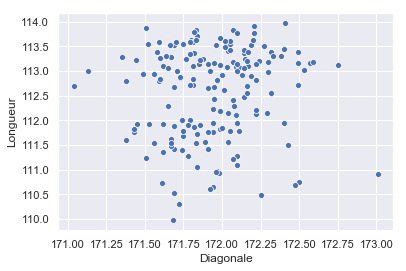

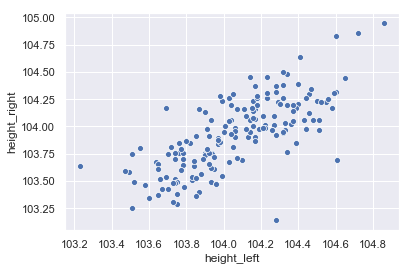

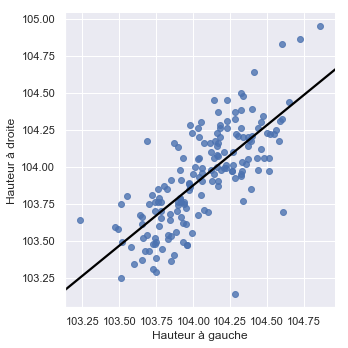

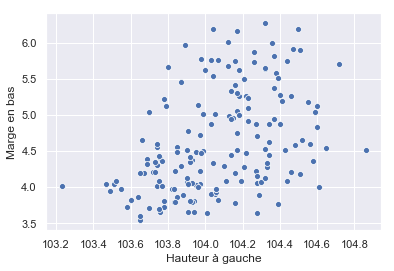

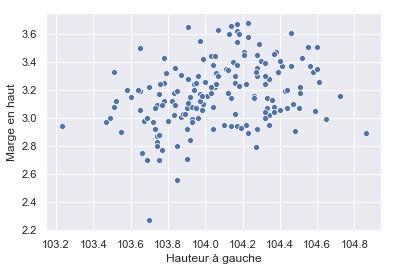

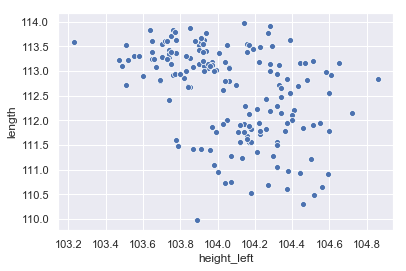

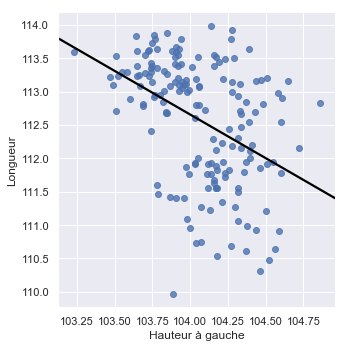

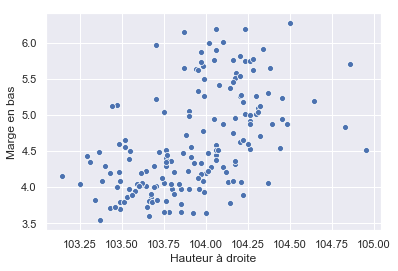

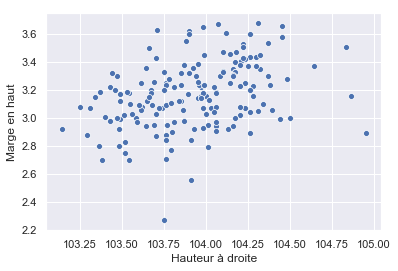

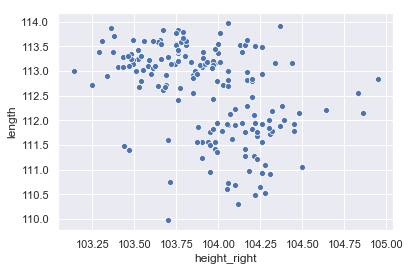

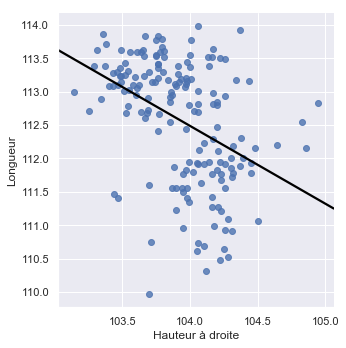

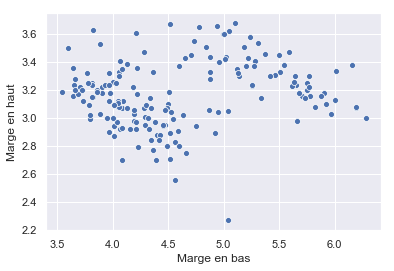

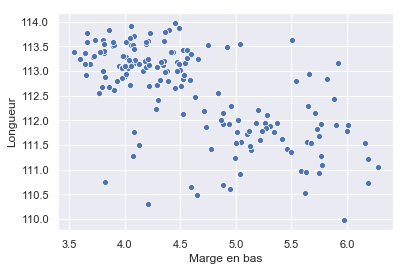

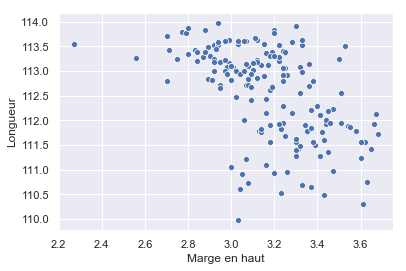

In [19]:
# Toutes les combinaisons des variables prises 2 à 2
sns.set()

#  ---  is_genuine
ax = sns.scatterplot(x="is_genuine", y="diagonal", data=notes)
ax.set(xlabel='Faux                            Vrai', ylabel='Diagonale'); plt.show()
ax = sns.scatterplot(x="is_genuine", y="height_left", data=notes)
ax.set(xlabel='Vrai/Faux', ylabel='Hauteur à gauche'); plt.show()
ax = sns.scatterplot(x="is_genuine", y="height_right", data=notes)
ax.set(xlabel='Vrai/Faux', ylabel='Hauteur à droite');  plt.show()
ax = sns.scatterplot(x="is_genuine", y="margin_low", data=notes)
ax.set(xlabel='Vrai/Faux', ylabel='Marge en bas'); plt.show()
ax = sns.scatterplot(x="is_genuine", y="margin_up", data=notes)
ax.set(xlabel='Vrai/Faux', ylabel='Marge en haut'); plt.show()
ax = sns.scatterplot(x="is_genuine", y="length", data=notes)
ax.set(xlabel='Vrai/Faux', ylabel='Longueur'); plt.show()

# ---   diagonal
ax = sns.scatterplot(x="diagonal", y="height_left", data=notes)
reg_simp = smf.ols('height_left ~ diagonal', data=notes).fit()
# ax = sns.lmplot(x="diagonal", y="height_left", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Diagonale', ylabel='Hauteur à gauche'); plt.show()

ax = sns.scatterplot(x="diagonal", y="height_right", data=notes)
reg_simp = smf.ols('height_right ~ diagonal', data=notes).fit()
# ax = sns.lmplot(x="diagonal", y="height_right", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Diagonale', ylabel='Hauteur à droite'); plt.show()

ax = sns.scatterplot(x="diagonal", y="margin_low", data=notes)
reg_simp = smf.ols('margin_low ~ diagonal', data=notes).fit()
# ax = sns.lmplot(x="diagonal", y="margin_low", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Diagonale', ylabel='Marge en bas'); plt.show()

ax = sns.scatterplot(x="diagonal", y="margin_up", data=notes)
reg_simp = smf.ols('margin_up ~ diagonal', data=notes).fit()
# ax = sns.lmplot(x="diagonal", y="margin_up", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Diagonale', ylabel='Marge en haut'); plt.show()

ax = sns.scatterplot(x="diagonal", y="length", data=notes)
reg_simp = smf.ols('length ~ diagonal', data=notes).fit()
# ax = sns.lmplot(x="diagonal", y="length", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Diagonale', ylabel='Longueur'); plt.show()

#  ---  height_left
ax = sns.scatterplot(x="height_left", y="height_right", data=notes)
reg_simp = smf.ols('height_right ~ height_left', data=notes).fit()
ax = sns.lmplot(x="height_left", y="height_right", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à gauche', ylabel='Hauteur à droite'); plt.show()

ax = sns.scatterplot(x="height_left", y="margin_low", data=notes)
reg_simp = smf.ols('margin_low ~ height_left', data=notes).fit()
# ax = sns.lmplot(x="height_left", y="margin_low", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à gauche', ylabel='Marge en bas'); plt.show()

ax = sns.scatterplot(x="height_left", y="margin_up", data=notes)
reg_simp = smf.ols('margin_up ~ height_left', data=notes).fit()
# ax = sns.lmplot(x="height_left", y="margin_up", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à gauche', ylabel='Marge en haut'); plt.show()

ax = sns.scatterplot(x="height_left", y="length", data=notes)
reg_simp = smf.ols('length ~ height_left', data=notes).fit()
ax = sns.lmplot(x="height_left", y="length", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à gauche', ylabel='Longueur'); plt.show()

#  ---  height_right
ax = sns.scatterplot(x="height_right", y="margin_low", data=notes)
reg_simp = smf.ols('margin_low ~ height_right', data=notes).fit()
# ax = sns.lmplot(x="height_right", y="margin_low", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à droite', ylabel='Marge en bas'); plt.show()

ax = sns.scatterplot(x="height_right", y="margin_up", data=notes)
reg_simp = smf.ols('margin_up ~ height_right', data=notes).fit()
# ax = sns.lmplot(x="height_right", y="margin_up", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à droite', ylabel='Marge en haut'); plt.show()

ax = sns.scatterplot(x="height_right", y="length", data=notes)
reg_simp = smf.ols('length ~ height_right', data=notes).fit()
ax = sns.lmplot(x="height_right", y="length", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Hauteur à droite', ylabel='Longueur'); plt.show()

#  ---  margin_low
ax = sns.scatterplot(x="margin_low", y="margin_up", data=notes)
reg_simp = smf.ols('margin_up ~ margin_low', data=notes).fit()
# ax = sns.lmplot(x="margin_low", y="margin_up", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Marge en bas', ylabel='Marge en haut'); plt.show()

ax = sns.scatterplot(x="margin_low", y="length", data=notes)
reg_simp = smf.ols('length ~ margin_low', data=notes).fit()
# ax = sns.lmplot(x="margin_low", y="length", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Marge en bas', ylabel='Longueur'); plt.show()

#  ---  margin_up
ax = sns.scatterplot(x="margin_up", y="length", data=notes)
reg_simp = smf.ols('length ~ margin_up', data=notes).fit()
# ax = sns.lmplot(x="margin_up", y="length", data=notes, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Marge en haut',ylabel='Longueur'); plt.show()


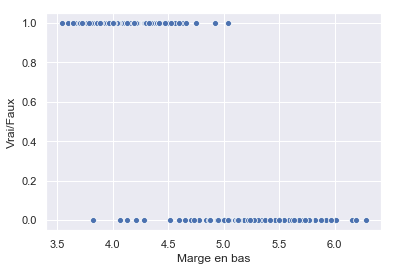

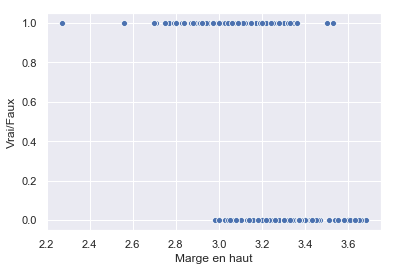

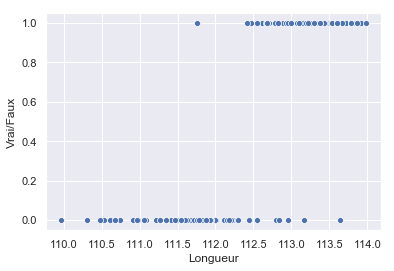

In [20]:
ax = sns.scatterplot(x="margin_low", y="is_genuine", data=notes)
ax.set(xlabel='Marge en bas', ylabel='Vrai/Faux');  plt.show()

ax = sns.scatterplot(x="margin_up", y="is_genuine", data=notes)
ax.set(xlabel='Marge en haut', ylabel='Vrai/Faux'); plt.show()

ax = sns.scatterplot(x="length", y="is_genuine", data=notes)
ax.set(xlabel='Longueur', ylabel='Vrai/Faux');      plt.show()


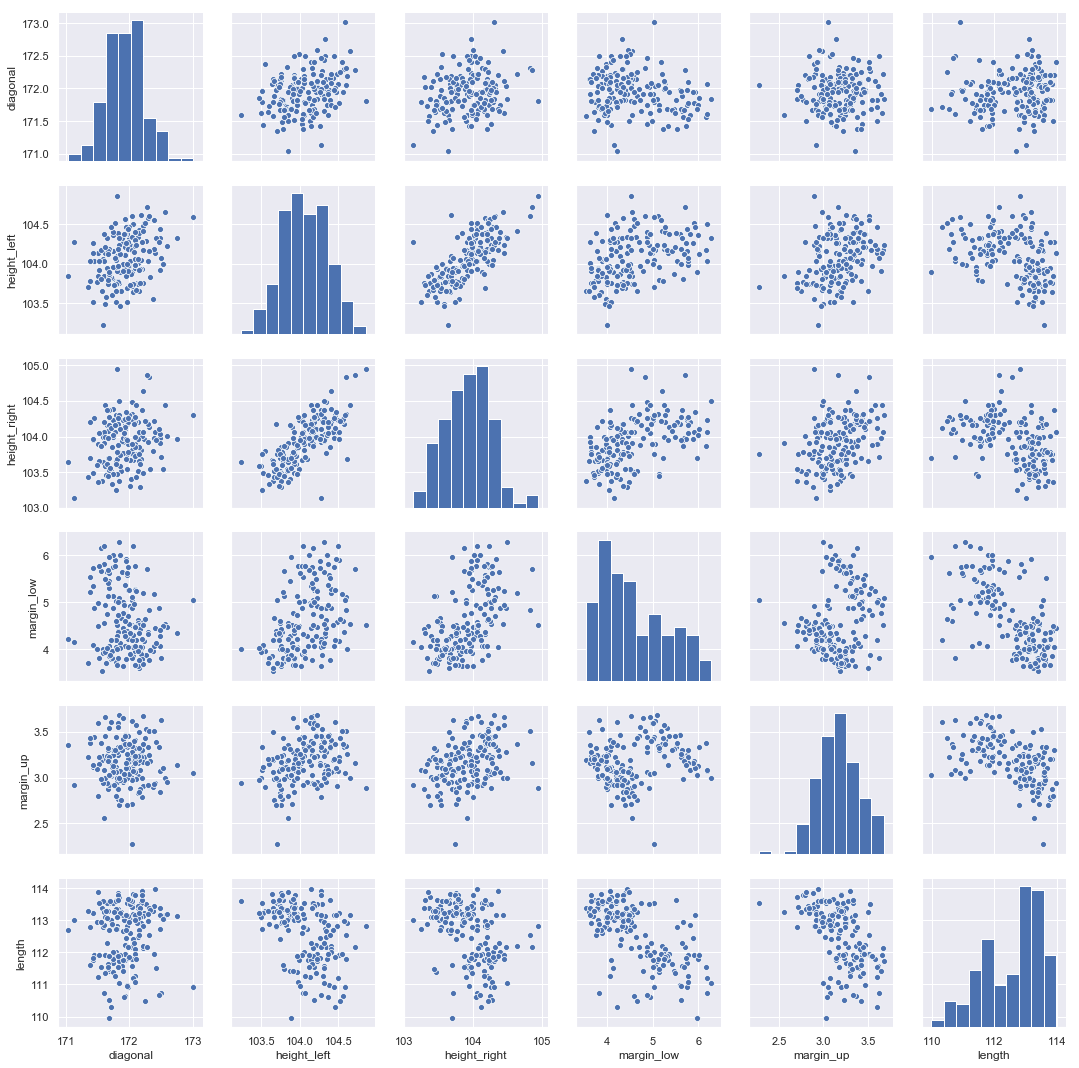

In [21]:
from sklearn import datasets
import seaborn as sns

data_corr = notes[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

sns.set()
sns.pairplot(data_corr);
plt.savefig('corr')

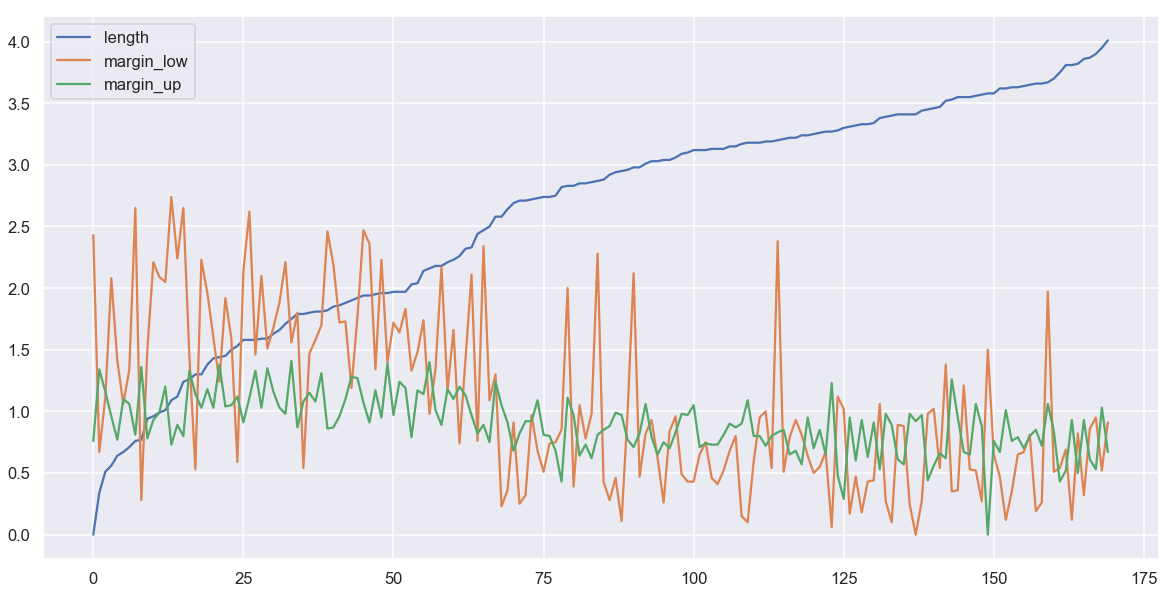

In [22]:
# Trie des billets selon une longueur ascendante afin d'observer l'évolution des autres variables
nt = notes.sort_values(by = 'length', ascending=True)

# On retire à chaque variable sa valeur minimum
nt.diagonal = nt.diagonal - 171.04
nt.length = nt.length - 109.97
nt.height_left = nt.height_left - 103.23
nt.height_right = nt.height_right - 103.14
nt.margin_low = nt.margin_low - 3.54
nt.margin_up = nt.margin_up - 2.27

plt.figure(figsize = (20, 10))

seaborn.set_style('darkgrid')
seaborn.set_context('talk')   # au choix :  paper, notebook, talk, poster

x = np.linspace(0, 169, 170)
y1 = nt.length
y2 = nt.diagonal
y3 = nt.height_left
y4 = nt.height_right
y5 = nt.margin_low
y6 = nt.margin_up

plt.plot(x, y1)   # length
# plt.plot(x, y2)   # diagonal     :  0
# plt.plot(x, y3)   # height_left  :  +
# plt.plot(x, y4)   # height_right :  +
plt.plot(x, y5)   # margin_low   :  +++
plt.plot(x, y6)   # margin_up    :  ++

# plt.savefig('length_diagonal')
plt.legend()
plt.show()


## Fonctions d'affichage

In [23]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import random
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# ----------------------------------------------------------------------------------------------------
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, \
                             illustrative_var=None, continent=None, cluster=None):
    
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
#             fig = plt.figure(figsize=(7,6))
            fig = plt.figure(figsize=(11,10))
        
            # mon ajout
            color = ['black','yellowgreen','red','blue','orange','purple','green','cyan','azure','magenta','violet',\
                     'chartreuse','springgreen','indigo', 'brown','cadetblue','coral','cornflowerblue', 'cornsilk',\
                     'chocolate','tan','steelblue','turquoise', 'wheat', 'whitesmoke', \
                     'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', \
                     'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', \
                     'teal', 'thistle', 'tomato']
            # le 'yellowgreen' est plus visible que le 'yellow'
        
            i=0
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                
                if continent is not None:
                    selected = np.where(illustrative_var == continent)
                    j=random.randint(0, 42)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=continent, c=[color[j]])
                elif cluster is not None:
                    selected = np.where(illustrative_var == cluster)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=cluster, marker='x')
                else:
                    for value in np.unique(illustrative_var):
                        selected = np.where(illustrative_var == value)
                        plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=[color[i]])
                        i+=1
#                         i+=2

            plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
#                      plt.text(x+0.3, y+0.3, labels[i], fontsize='10', ha='center',va='center') 
                     plt.text(x+0.1, y+0.1, labels[i], fontsize='10', ha='center',va='center') 

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# ----------------------------------------------------------------------------------------------------
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

# ----------------------------------------------------------------------------------------------------
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()


# Analyse en Composantes Principales

% de variance associées aux axes 1, 2, 3, 4, 5, 6 :
 [0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


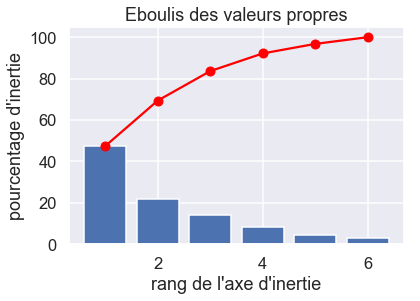

In [24]:
n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = notes[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = notes[["is_genuine"]]   # vrai ou faux billet
# préparation des données pour l'ACP
# data_pca = data_pca.fillna(data_pca.mean()) # remplace les valeurs inconnues par la moyenne de la variable
X = data_pca.values                           # conversion en numpy.ndarray => suppression du nom de colonne et ligne

features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# print(X_scaled)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
# pca.fit(X_scaled)                            # 
coord = pca.fit_transform(X_scaled)            # retourne les coordonnées factorielles
# print(coord)

   
print("% de variance associées aux axes 1, 2, 3, 4, 5, 6 :\n", pca.explained_variance_ratio_) # % de variance associées aux axes
# print(pca.explained_variance_ratio_.sum())  # Variance expliquée cumulée = 1
# print(pca.explained_variance_), 5, 6

# La 1ère composante explique 47.44% de la variance observée, la 2nd explique 21.95%, soit 69.39% de l'inertie totale


# --- Eboulis des valeurs propres :  - Pourcentage d’inertie totale associé à chaque axe (en bleu)
#                                    - Somme cumulée des inerties                        (en rouge)
display_scree_plot(pca)

In [25]:
#  test des bâtons brisés

n = data_pca.shape[0]   # nombre d'observations
p = data_pca.shape[1]   # nombre de variables

eigval = (n-1)/n*pca.explained_variance_   # valeur corrigée

# seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))
# Critère de Kaiser – Guttman :  Retenir les k composants ayant une valeur propre supérieure à 1. => F1 et F2

   Val.Propre    Seuils
0    2.846875  2.450000
1    1.317426  1.450000
2    0.854071  0.950000
3    0.511578  0.616667
4    0.276769  0.366667
5    0.193280  0.166667


###  - Qualité de représentation des billets   +   Contribution des billets aux composantes principales

In [26]:
# calcul des carrés des distances à l’origine des billets = leur contribution dans l’inertie totale

di = np.sum(X_scaled**2,axis=1)   # X_scaled contient les données centrées-réduites AVANT la projection sur les différents axes

DI = pd.DataFrame({'ID':data_pca.index,'d_i':di})

print("Carré des distances à l'origine des Billets")
print("-------------------------------------------")
print(DI.sort_values(by = 'd_i', ascending=False))

# Moyenne de d_i = 6.00 => On retient pour démonstration les points qui sont au-dessus de la moyenne
DI.loc[DI['d_i'] < 6, 'd_i'] = 0   # met à 0 les valeurs < 6
DI.loc[DI['d_i'] > 6, 'd_i'] = 1   # met à 1 les valeurs > 6
carre_dist = DI["d_i"]             # pour la projection des billets

# classement de contribution et de qualité de représentation 

Carré des distances à l'origine des Billets
-------------------------------------------
      ID        d_i
166  166  20.625650
0      0  18.410598
4      4  18.039567
122  122  16.790944
39    39  15.052608
112  112  14.422407
151  151  13.637281
49    49  12.917538
160  160  12.831169
158  158  12.724639
159  159  12.438171
5      5  11.527985
70    70  11.048897
121  121  10.584966
153  153  10.557970
147  147  10.500350
29    29  10.117561
40    40   9.976934
75    75   9.847119
7      7   9.344338
15    15   9.071217
142  142   8.995974
45    45   8.949829
127  127   8.901741
137  137   8.812146
44    44   8.783168
129  129   8.686112
131  131   8.616709
167  167   8.567410
146  146   8.432900
109  109   8.413457
34    34   8.374589
101  101   8.249495
6      6   8.029025
93    93   7.926732
156  156   7.862470
82    82   7.795256
119  119   7.776985
120  120   7.763637
54    54   7.724273
165  165   7.673233
18    18   7.667110
66    66   7.521768
145  145   7.405030
42    42   7

In [30]:
#     Qualité de représentation des billets - COS2  -  sur les axes 1,2,3,4

cos2 = coord**2
for j in range(6):            # 6 c'est le nombre de colonnes, 'is_genuine' en moins = nombre de variables
    cos2[:,j] = cos2[:,j]/di
    
# print(pandas.DataFrame({'id':data_pca.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))
# print(pd.DataFrame({'id':data_pca.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3]}))

COS2 = pd.DataFrame({'id':data_pca.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3]})

# Pour chaque individu , la qualité de sa représentation est définie par le carré du cosinus de l’angle entre 
#  l’axe de projection et le vecteur . Plus la valeur est proche de 1, meilleure est la qualité de représentation

# Ce critère n’a pas de signification pour les individus proches de l’origine.  Quand on détecte un individu pour lequel 
#   le cosinus carré est faible, on doit tenir compte de sa distance à l’origine avant d’indiquer qu’il est mal représenté.

# Un cosinus carré ayant une valeur proche de 1 traduit une bonne (« fidèle ») représentation de l’individu 
# sur l’axe correspondant et inversement si le cosinus carré est proche de zéro.



COS2['COS2_PLAN_1'] = COS2['COS2_1'] + COS2['COS2_2']   # 1er plan factoriel

COS2_TRIE = COS2.sort_values(by = 'COS2_PLAN_1', ascending=False)

# COS2.loc[COS2['COS2_PLAN_1'] < 0.50, 'COS2_PLAN_1'] = 0   # met à 0 les valeurs inférieures à 0.50
# COS2.loc[COS2['COS2_PLAN_1'] > 0.50, 'COS2_PLAN_1'] = 1   # met à 1 les valeurs supérieures à 0.50
# cosinus2 = COS2["COS2_PLAN_1"]                            # à faire apparaitre sur la projection des individus
COS2

# mean(COS2_PLAN_1) =  0.687

,id,COS2_1,COS2_2,COS2_3,COS2_4,COS2_PLAN_1
0,0,0.251929,0.139000,1.735403e-01,0.321649,0.390929
1,1,0.818002,0.050822,5.406524e-02,0.021803,0.868824
2,2,0.784862,0.000466,1.486520e-01,0.028320,0.785329
3,3,0.882856,0.001652,5.878888e-02,0.056169,0.884508
4,4,0.320145,0.009417,6.108311e-01,0.038839,0.329562
5,5,0.132447,0.771985,7.879189e-02,0.013115,0.904432
6,6,0.538540,0.164137,3.652336e-03,0.115076,0.702677
7,7,0.736813,0.115779,1.223157e-01,0.013759,0.852592
8,8,0.505695,0.008692,2.206032e-01,0.000685,0.514386
9,9,0.222965,0.476836,2.093624e-01,0.005403,0.699802


In [28]:
#  Contribution des individus aux axes (CTR).

# Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur.
# CTR : PART (en %) DE L'INDIVIDU DANS LA CONSTRUCTION DU FACTEUR

# variance expliquée corrigée
eigval = (n-1)/n*pca.explained_variance_
# print(eigval)

ctr = coord**2
for j in range(6):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

# print(pd.DataFrame({'id':data_pca.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3]}))

CTR = pd.DataFrame({'id':data_pca.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3]})

CTR1_TRIE = CTR.sort_values(by = 'CTR_1', ascending=False)
CTR2_TRIE = CTR.sort_values(by = 'CTR_2', ascending=False)

# CTR.loc[CTR['CTR_1'] < 0.005882, 'CTR_1'] = 0         # met à 0 les valeurs inférieures à 0.005882
# CTR.loc[CTR['CTR_1'] > 0.005882, 'CTR_1'] = 1         # met à 1 les valeurs supérieures à 0.005882
# CTR.loc[CTR['CTR_2'] < 0.005882, 'CTR_2'] = 0         # met à 0 les valeurs inférieures à 0.005882
# CTR.loc[CTR['CTR_2'] > 0.005882, 'CTR_2'] = 1         # met à 1 les valeurs supérieures à 0.005882
cr1 = CTR["CTR_1"]                                       # à faire apparaitre sur la projection des individus
cr2 = CTR["CTR_2"]                                       # à faire apparaitre sur la projection des individus

# Moyenne CTR_1 :  0.005882   
# Moyenne CTR_2 :  0.005882   , Oui les deux moyennes sont égales

# CTR.sort_values(by = 'CTR_1', ascending=False)

# Affichage des billets qui pèsent au-dessus de la moyenne pour F1 et F2
# CTR
# CTR1_TRIE
# CTR2_TRIE

,id,CTR_2
5,5,0.039736
166,166,0.037927
34,34,0.033302
156,156,0.032264
70,70,0.031516
151,151,0.026922
21,21,0.025151
23,23,0.023682
131,131,0.019298
153,153,0.019276


## Projection des variables : Cercle des corrélations

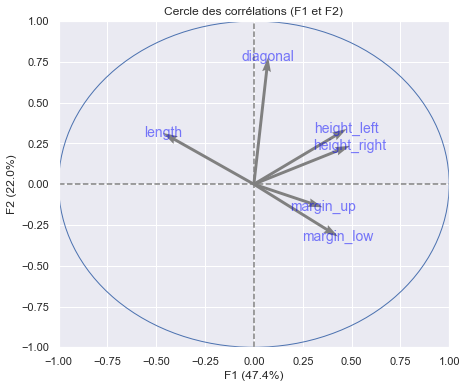

In [31]:
pcs = pca.components_

# 1er plan factoriel
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Le 1er plan factoriel (F1+F2) représente (47.4 + 22.0)% = 69.4% de l'inertie totale => 69.4% de la variance
#    => on peut se contenter de ce 1er plan
# Rappel :  les composantes principales synthétisent les variables initiales 

# En conservant les deux premiers axes on va expliquer 69.4% de l’inertie totale du nuage de point. 


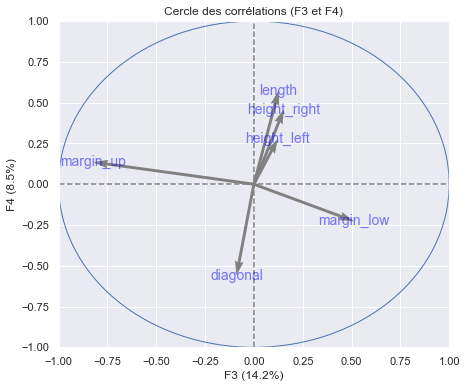

In [32]:
# 2ème plan factoriel
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

In [33]:
# Combinaisons linéaires des variables (diagonal, height_left, height_right, margin_low, margin_up, length) 

F1 = pca.components_[0]; print("F1 =",F1)
F2 = pca.components_[1]; print("F2 =",F2)
F3 = pca.components_[2]; print("F3 =",F3)
F4 = pca.components_[3]; print("F4 =",F4)

# F1 =  0.07 *diagonal  +0.47 *height_left  +0.49 *height_right  +0.43 *margin_low  +0.35 *margin_up  -0.46 *length
# F2 =  0.78 *diagonal  +0.34 *height_left  +0.23 *height_right  -0.32 *margin_low  -0.14 *margin_up  +0.31 *length

F1 = [ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
F2 = [ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]
F3 = [-0.08889419  0.12276016  0.15383022  0.5128076  -0.82114881  0.12691346]
F4 = [-0.55973158  0.2780463   0.45893794 -0.22652773  0.13533955  0.57370304]


In [34]:
# --------------------------------------------------------------------------------------------------
# F1  est une combinaison linéaire des variables :
#        "diagonal"   "height_left"  "height_right"  "margin_low"  "margin_up"   "length"  
# F1 = [  0.07327499   0.47550205     0.4918214       0.43102671    0.35253984   -0.46537288 ]
# F2 = [  0.77963908   0.33925019     0.23554253     -0.32053699   -0.14111974    0.31453645 ]

# Dans l'ordre d'importanc du poids des variables initiales dans F1 on a :
#      height_right > height_left > -length > margin_low > margin_up > diagonal

# Dans l'ordre d'importanc du poids des variables initiales dans F2 on a :
#      diagonal > height_left > -margin_low > length > height_right > -margin_up

# Remarques :
# Les variables height_right, height_left, margin_low sont plutôt bien corrélées à F1
#          avec length anti-corrélé à F1.
# Quand la hauteur (à droite ou à gauche) du billet augmente le billet semble se raccourcir
# Quand la marge (en bas ou en haut) du billet augmente le billet semble se raccourcir

# La hauteur droite est trés corrélée à la hauteur gauche
# Les marges (surtout celle du bas) sont anti-corrélées à la longueur

# La variable diagonal est trés corrélée à F2,
#     puis viennent les variables height_left et length.  margin_low est anti-corrélé à F2

# !!!  il n'y a quasiment aucune corélation entre la Diagonale et la Longueur du billet.

### Projection de tous les BILLETS    (Une couleur pour VRAI, une couleur pour FAUX)

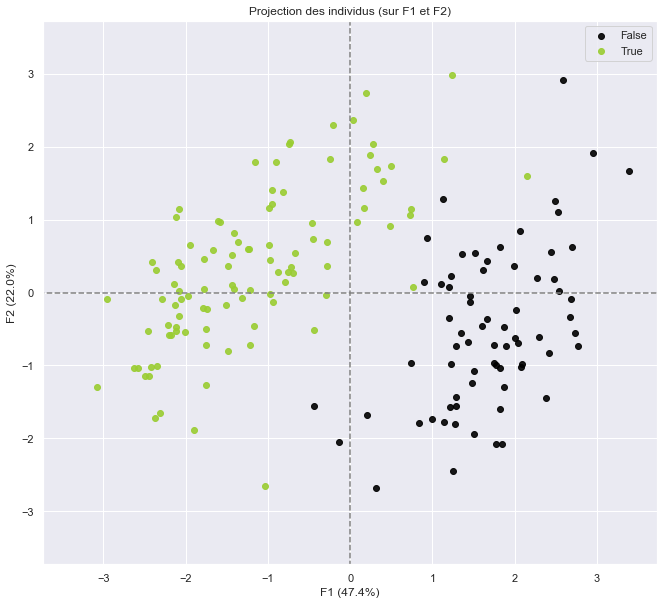

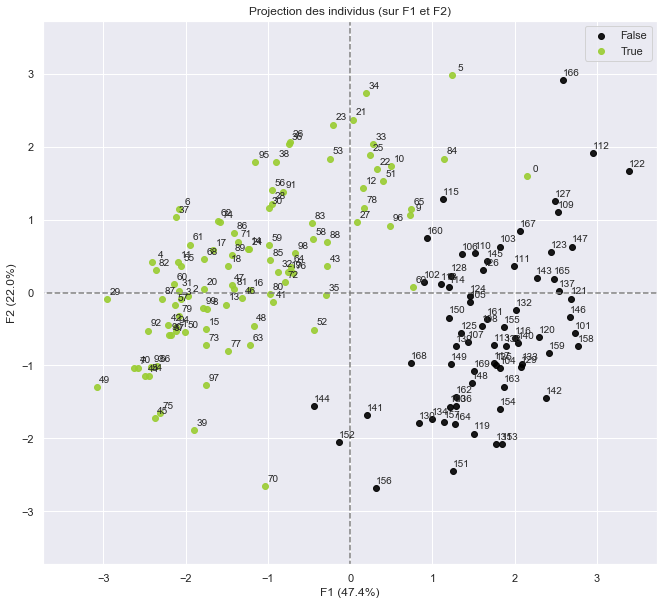

In [35]:
# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

genuine = notes["is_genuine"]   # vrai ou faux billet

display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9, labels = notes.index)


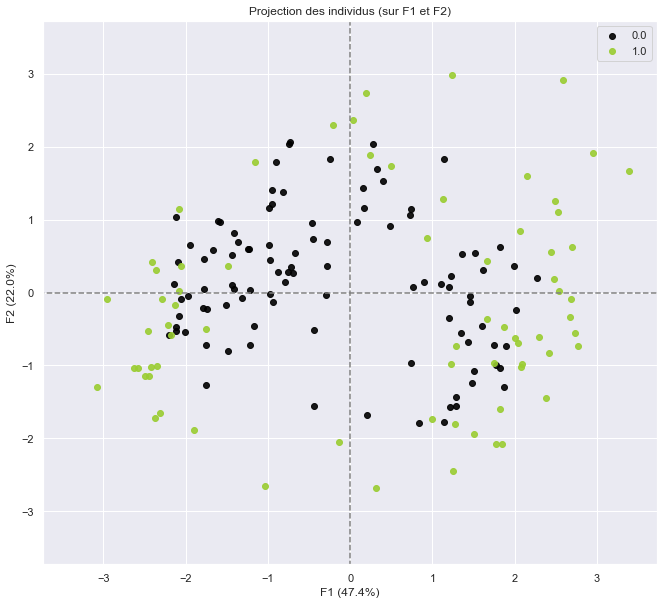

In [36]:
# Affiche en VERT les billets dont le Carré des distances à l'origine est au-dessus de la moyenne
# Ce sont les billets qui contribuent le plus à l’inertie totale.

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = carre_dist, alpha = 0.9)


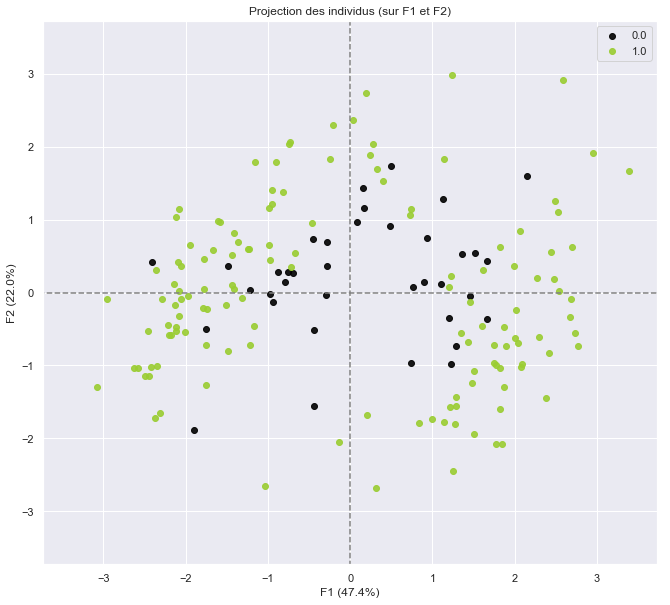

In [37]:
# Affiche en VERT les billets les mieux représentés sur le 1er plan factoriel, c'est à dire les billets pour lesquels
#         le 1er plan factoriel affiche plus de 50% de leur inertie

# COS2  représente la répartition de l'individu sur les différents facteurs. La somme horizontale sera égale à 100%

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = cosinus2, alpha = 0.9)


# Environ 36 billets sur 170 sont mal représentés en prenant l'ypothèse qu'un billet mal représenté affiche moins de 50%
#         de son inertie sur le 1er plan factoriel.

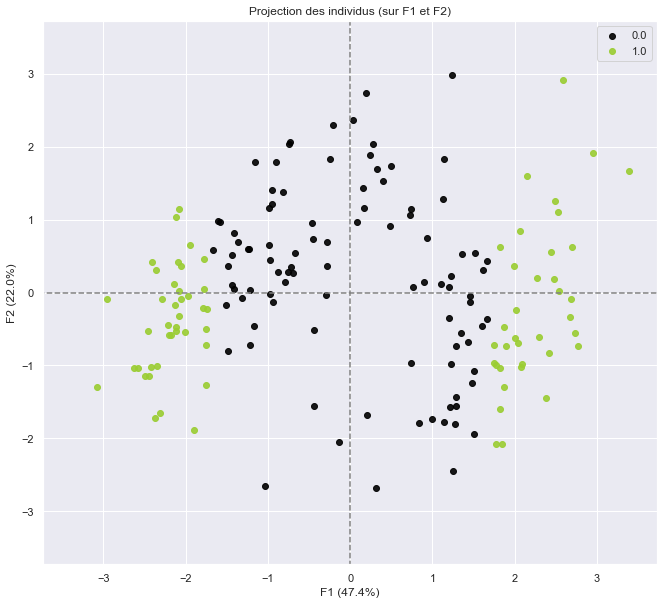

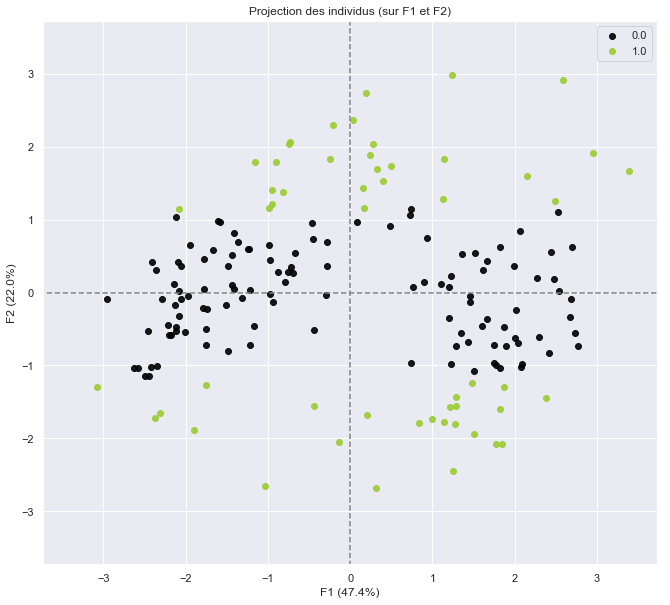

In [38]:
# Affiche en VERT les billets qui pèsent au-dessus de la moyenne pour F1 et F2

# COS2  représente la répartition de l'individu sur les différents facteurs. La somme horizontale sera égale à 100%

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = cr1, alpha = 0.9)   # pour F1

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = cr2, alpha = 0.9)   # pour F2


In [40]:
# is_genuine  diagonal    height_left  height_right    margin_low  margin_up    length
# notes.sort_values(by = 'length')
# notes.sort_values(by = 'margin_low')
# notes.sort_values(by = 'margin_up')
# notes.sort_values(by = 'height_left')
# notes.sort_values(by = 'height_right')
# notes.sort_values(by = 'diagonal')

## Classification K-means

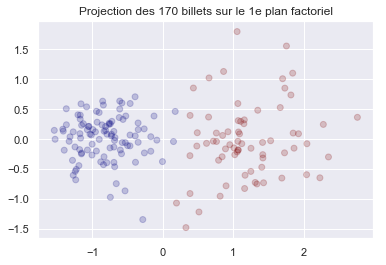

,key_0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster,billet
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83,0,0
1,1,True,171.67,103.74,103.70,4.01,2.87,113.29,0,1
2,2,True,171.83,103.76,103.76,4.40,2.88,113.84,0,2
3,3,True,171.80,103.78,103.65,3.73,3.12,113.63,0,3
4,4,True,172.05,103.70,103.75,5.04,2.27,113.55,0,4


In [41]:
#  Cluster selon K-means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 2

data2 = notes[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

billets = notes[["is_genuine"]]

# préparation des données pour le clustering
X2 = data2.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled2 = preprocessing.StandardScaler().fit_transform(X2)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X2)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca2 = decomposition.PCA(n_components=3).fit(X2)
X_projected2 = pca2.transform(X2)
plt.scatter(X_projected2[:, 0], X_projected2[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} billets sur le 1e plan factoriel".format(X_projected2.shape[0]))
plt.show(block=False)

# 
cc = pd.DataFrame({"cluster": clusters, "billet": notes.index.values})
totCluster = pd.merge(notes,cc, on=notes.index.values)

clus = cc["cluster"]
totCluster.head(5)


## Explication K-means

In [42]:
#   Est-ce que l'algorithme K-means a été efficace ? 
#           <=> Les clusters séparent-ils efficacement les Vrai billets des Faux billets ?

# Cluster 1 --> A priori les FAUX
# Cluster 0 --> A priori les VRAI

print(len(totCluster[(totCluster.is_genuine == True)  & (totCluster.cluster == 0)]))   # 99 Vrai dans le cluster des Vrai
print(len(totCluster[(totCluster.is_genuine == True)  & (totCluster.cluster == 1)]))   #  1 Vrai dans le cluster des Faux
print(len(totCluster[(totCluster.is_genuine == False) & (totCluster.cluster == 0)]))   #  2 Faux dans le cluster des Vrai
print(len(totCluster[(totCluster.is_genuine == False) & (totCluster.cluster == 1)]))   # 68 Faux dans le cluster des Faux


99
1
2
68


### Projection de tous les BILLETS (Une couleur -> Un cluster)

In [43]:
# Projection des individus (= Billets)

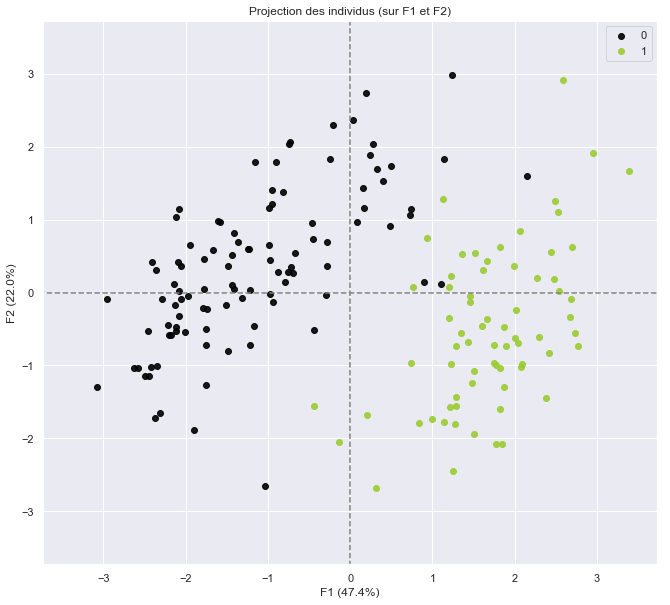

In [44]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=None, alpha=0.9, illustrative_var=clus, \
                         continent=None, cluster=None)

# Le cluster 1 coincide avec de FAUX billets
# Le cluster 0 coincide avec de VRAI billets

##  Régression logistique avec sklearn

In [45]:
# On sépare notre jeu de donnée de manière classique entre données d'entraînement et données de test

from sklearn.model_selection import train_test_split

# On récupère les variables explicatives d'un côté ...
X = notes.iloc[:,1:7]   # toutes les lignes et les colonnes de 1 à 6
# is_genuine(0)  diagonal(1)   height_left(2) height_right(3)    margin_low(4)  margin_up(5)    length(6)

# ... et la variable expliquée de l'autre :  c'est la 1ere colonne 'is_genuine'
y = notes.iloc[:,0] 

# 1. Séparation entre les données d'entrainement et les données test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


# X_train       # données explicatives d'entrainement
# X_test        # données explicatives de test, pour tester le classifieur

# y_train       # données expliquées ('is_genuine') relative à X_train
# y_test        # données expliquées ('is_genuine') relative à X_test

In [46]:
# # 2. Cas ou TOUTES les données sont prises comme données d'entrainement => pas de train_test_split()

# X_train = notes.iloc[:,1:7]   # toutes les lignes des colonnes de 1 à 6
# # is_genuine(0)  diagonal(1)   height_left(2) height_right(3)    margin_low(4)  margin_up(5)    length(6)

# # target :  toutes les lignes de la colonnes 0: 'is_genuine'
# y_train = notes.iloc[:,0] 


In [47]:
# "example.csv" :  fichier avec 5 billets à évaluer

X_example = pd.read_csv("example.csv")        
X_example.drop('id', axis=1, inplace=True)   # delete la colonne 'id' qui gêne

# On n'a pas la colonne 'is_genuine'
y_example = pd.Series([False, False, False, True, True], name = 'is_genuine')

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train,y_train)   # Lance le mécanisme d'apprentissage pour obtenir le modèle de classifieur

# Prédiction (sur données test) que le billet soit VRAI  => 2ème colonne ([:,1])
y_prob = lr.predict_proba(X_test)[:,1]
# lr.score(X_test, y_test)
# lr.predict(X_test)

# Prédiction (sur données du fichier "example.csv") que le billet soit VRAI  => 2ème colonne ([:,1])
y_prob_example = lr.predict_proba(X_example)[:,1]
# [0.06112165, 0.01643998, 0.03597533, 0.83514239, 0.99390772]  -> Les deux derniers billets sont VRAI
# lr.score(X_example, y_example)
lr.predict(X_example)

# print('Coefficients: \n', lr.coef_)
predictions = lr.predict(X_example)
from sklearn.metrics import classification_report
print(classification_report(y_example,predictions))

# ------------------------------------------------------------------------------------------------------
# decision_function(X)           Predict confidence scores for samples.
# densify()                      Convert coefficient matrix to dense array format.
# fit(X, y[, sample_weight])     Fit the model according to the given training data.
# get_params([deep])             Get parameters for this estimator.
#   predict(X_new)                 Predict class labels for samples in X.
#   predict_proba(X_new)           Probability estimates.
# predict_log_proba(X_new)       Log of probability estimates.
#   score(X_test, y_test)          Returns the mean accuracy on the given test data and labels.
# set_params(**params)           Set the parameters of this estimator.
# sparsify()                     Convert coefficient matrix to sparse format.

In [ ]:
y_prob_example

## Evaluation du modèle de classification

In [ ]:
# Affichage de la courbe ROC pour l'évaluation du classifieur
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_prob)   # compare les données test aux données prédites
#   fpr:  tableau des valeurs des faux positifs en fonction du seuil (thr qui augmente de environ 0 à 1)
#   tpr:  taux de vrai positifs ...
#                                         Pourquoi fpr ne contient que 5 valeurs ?   [0.  , 0.  , 0.04, 0.04, 1.  ]
    
plt.plot(fpr, tpr, color='red')          # Taux de vrai positifs en fonction du taux de faux positifs
plt.plot([0,1], [0,1], linestyle='--')   # diagonal du carré qui représente un classifieur aléatoire
plt.show()
# => On voit bien que notre classifieur performe beaucoup mieux qu'un classifieur aléatoire

# valeur de l'air sous la courbe
print(metrics.auc(fpr, tpr))   # = 0.99 => Trés bon classifieur

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print(roc_auc)


# La courbe ROC (Receiver Operating Characteristic) représente la sensibilité en fonction de la spécificité 
#      pour différents seuils de décision s. 
# L'aire sous la courbe ROC , l' AUC (Area Under the ROC ), est une mesure de la qualité de la classification qui varie entre :
#  . AUC= 1/2  : dans le pire des cas ;
#  . AUC= 1    : dans le meilleur des cas.

In [ ]:
from sklearn import metrics

y_prob = lr.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_prob)
cnf_matrix

In [ ]:
# Confusion Matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
plt.ylabel('Réel')
plt.xlabel('Prédit')

# Text(0.5,257.44,'Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prob))
print("Precision:",metrics.precision_score(y_test, y_prob))
print("Recall:",metrics.recall_score(y_test, y_prob))

In [ ]:
# from sklearn.feature_selection import RFE

# rfe = RFE(lr, 20)
# rfe = rfe.fit(X_train,y_train)
# print(rfe.support_)
# print(rfe.ranking_)

# import statsmodels.api as sm
# logit_model=sm.Logit(y_train,X_train)
# result=logit_model.fit()
# print(result.summary2())

In [ ]:
# Prédiction avec les données test

predictions = lr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
# Prédiction avec les données du fichier "example.csv"

predictions = lr.predict(X_example)

from sklearn.metrics import classification_report
print(classification_report(y_example,predictions))

# 3 FAUX billets, 2 VRAI billets

In [ ]:
# Prédiction avec les données du fichier de soutenance

X_surprise = pd.read_csv("test-billet.csv") 
id = X_surprise['id']
X_surprise.drop('id', axis=1, inplace=True)   # delete la colonne 'id' qui gêne

# On n'a pas la colonne 'is_genuine'
y_surprise = pd.Series([False, False, False, True, True], name = 'is_genuine')

y_prob_surprise = lr.predict_proba(X_surprise)[:,1]

lr.predict(X_surprise)
ser = pd.Series(lr.predict(X_surprise))
ser2 = pd.Series(y_prob_surprise)
X_surprise['id'] = id
X_surprise['is_genuine'] = ser
X_surprise['proba'] = ser2
X_surprise

In [ ]:
# y_prob_surprise

##  Régression logistique avec statsmodels

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_up+margin_low+length',
                   data=notes, family=sm.families.Binomial()).fit()

print(reg_log2.summary())

# Lorsqu'on retire margin_low ou margin_up, c'est OK.  Il n'y a qu'en enlevant une de ces deux là que çà marche ou les deux
# Coef de Pearson margin_low/length =  -0.6373516884716645
# Coef de Pearson margin_up/length  =  -0.5252838489032959


In [ ]:
notes.loc[notes['is_genuine'] == True, 'is_genuine'] = 1
notes.loc[notes['is_genuine'] == False, 'is_genuine'] = 0

In [ ]:
# Suppression de : lenght

reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up',
                   data=notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

# On enlève 'height_right' qui n'est pas significatif avec une p-value= 0.475

In [ ]:
# Suppression de : lenght , height_right

reg_log2 = smf.glm('is_genuine~diagonal+height_left+margin_low+margin_up',data=notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

# => On enlève 'height_left' qui n'est paqs significatif avec une p-value= 0.520

In [ ]:
# Suppression de : lenght , height_right , height_left

reg_log2 = smf.glm('is_genuine~diagonal+margin_low+margin_up', data=notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

# => On enlève 'diagonal' qui n'est pas significatif avec une p-value= 0.522

In [ ]:
# Suppression de : lenght , height_right , height_left , diagonal

reg_log2 = smf.glm('is_genuine~margin_low+margin_up', data=notes, family=sm.families.Binomial()).fit()   # OK
print(reg_log2.summary())


In [ ]:
# margin_low + margin_up + length

reg_log2 = smf.glm('is_genuine~+margin_up+length', data=notes, family=sm.families.Binomial()).fit()   # KO
print(reg_log2.summary())


In [ ]:
def pred_with_margin_up(list_margin_up):   #pandas.core.series.Series
    mean_mu = []
    for marge in list_margin_up:
        pred = reg_log_mu.get_prediction(pd.DataFrame([{"const":1,"margin_up": marge}]))
        mean_mu.append(pred.predicted_mean[0])
    return mean_mu

In [ ]:
def pred_with_margin_low(list_margin_low):
    mean_ml = []
    for marge in list_margin_low:
        pred = reg_log_ml.get_prediction(pd.DataFrame([{"const":1,"margin_low": marge}]))
        mean_ml.append(pred.predicted_mean[0])
    return mean_ml

In [ ]:
def pred_with_length(list_length):
    mean_l = []
    for length in list_length:
        pred = reg_log_l.get_prediction(pd.DataFrame([{"const":1,"length": length}]))
        mean_l.append(pred.predicted_mean[0])
    return mean_l 

In [ ]:
#   MARGIN_LOW

reg_log_ml = smf.glm('is_genuine~margin_low', data=notes, family=sm.families.Binomial()).fit()   # glm   : definition du modèle
                                                                                                 # fit() : calcule le modèle
print(reg_log_ml.summary())                                                                      # voir le résultat
# print(reg_log_ml.model.data.endog)   # les variables à prédire
 
beta1 = reg_log_ml.params[0]   # =  26.4357  (Intercept)
beta2 = reg_log_ml.params[1]   # =  -5.6461
print("beta1 =",beta1)
print("beta2 =",beta2)

# margin_low >>  Max: 6.28 / Min: 3.54
x = np.linspace(start=3.54, stop=6.28, num=170)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))   # Calcul de la probabilité compris entre 0 et 1

reg_log = pd.DataFrame(data={'margin_low': x, 'prop_genuine': y})

plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="margin_low", y="is_genuine", data=notes)                                   # points
plt.plot(reg_log['margin_low'], reg_log['prop_genuine'], color='red', label='Courbe logistique')   # courbe
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



# ------ Test avec les margin_low du fichier example ----------

x0 = pd.DataFrame([{"const":1,"margin_low": 5.21}])   # F
pred = reg_log_ml.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_low": 6.0}])   # F
pred = reg_log_ml.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_low": 4.99}])   # F
pred = reg_log_ml.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_low": 4.44}])   # V
pred = reg_log_ml.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_low": 3.77}])   # V
pred = reg_log_ml.get_prediction(x0)
print(pred.summary_frame())

In [ ]:
#   MARGIN_UP

reg_log_mu = smf.glm('is_genuine~margin_up', data=notes, family=sm.families.Binomial()).fit()   # OK
print(reg_log_mu.summary())

beta1 = reg_log_mu.params[0]   # = 26.1556  (Intercept)
beta2 = reg_log_mu.params[1]   # = -8.0712
print("beta1 =",beta1)
print("beta2 =",beta2)


# margin_up >>  Max: 3.68 / Min: 2.27
x = np.linspace(start=2.27, stop=3.68, num=170)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))   # Calcul de la probabilité compris entre 0 et 1

reg_log = pd.DataFrame(data={'margin_up': x, 'prop_genuine': y})

plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="margin_up", y="is_genuine", data=notes)                                 # points
plt.plot(reg_log['margin_up'], reg_log['prop_genuine'], color='red', label='Courbe logistique')   # courbe
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



# ------ Test avec les marge_up du fichier example ----------

x0 = pd.DataFrame([{"const":1,"margin_up": 3.3}])   # F
pred = reg_log_mu.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_up": 3.31}])   # F
pred = reg_log_mu.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_up": 3.39}])   # F
pred = reg_log_mu.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_up": 3.03}])   # V
pred = reg_log_mu.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"margin_up": 3.16}])   # V
pred = reg_log_mu.get_prediction(x0)
print(pred.summary_frame())


In [ ]:
#   LENGTH

reg_log_l = smf.glm('is_genuine~length', data=notes, family=sm.families.Binomial()).fit()   # OK
print(reg_log_l.summary())

beta1 = reg_log_l.params[0]   # = -549.0766  (Intercept)
beta2 = reg_log_l.params[1]   # =    4.8811
print("beta1 =",beta1)
print("beta2 =",beta2)
print("reg_log_l.params = ", reg_log_l.params)


# length >>  Max: 113.98 / Min: 109.97
x = np.linspace(start=109.97, stop=113.98, num=170)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))   # Calcul de la probabilité compris entre 0 et 1

reg_log = pd.DataFrame(data={'length': x, 'prop_genuine': y})

plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="length", y="is_genuine", data=notes)                                   # points
plt.plot(reg_log['length'], reg_log['prop_genuine'], color='red', label='Courbe logistique')   # courbe
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



# ------ Test avec les length du fichier example ----------
ll=111.42
x0 = pd.DataFrame([{"const":1,"length": 111.42}])   # F
# pred = reg_log_l.get_prediction(x0)
pred = reg_log_l.get_prediction(pd.DataFrame([{"const":1,"length": ll}]))
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"length": 112.09}])   # F
pred = reg_log_l.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"length": 111.57}])   # F
pred = reg_log_l.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"length": 113.2}])   # V
pred = reg_log_l.get_prediction(x0)
print(pred.summary_frame())

x0 = pd.DataFrame([{"const":1,"length": 113.33}])   # V
pred = reg_log_l.get_prediction(x0)
print(pred.summary_frame())

pp= pred.summary_frame()
type(pp)   # pandas.core.frame.DataFrame
pred.predicted_mean[0]
# type(pred)   # statsmodels.genmod._prediction.PredictionResults

In [ ]:
# Traitement d'un fichier exemple contenant des billets dont il faut séparer les Vrais des Faux

example = pd.read_csv("example.csv")
# example.head(5)

# Calcul de la prédiction en fonction de trois variables explicatives :  'margin_up', 'margin_low', 'length'
mean_mu = pred_with_margin_up(example.margin_up)
mean_ml = pred_with_margin_low(example.margin_low)
mean_l  = pred_with_length(example.length)
# print("mean_mu =",mean_mu)
# print("mean_ml =",mean_ml)
# print("mean_l =",mean_l)

example["Prob_mu"] = mean_mu
example["Prob_ml"] = mean_ml
example["Prob_l"]  = mean_l

# Arrangement des colonnes
example = example.reindex(columns = ['diagonal','height_left','height_right','id','margin_low','Prob_ml','margin_up','Prob_mu','length','Prob_l'])

example

In [ ]:
#   Test avec les 3 variables qui semblent significatives pour la prédiction.

# Conclusion :
Les billets (A_1, A_2, A_3) sont FAUX
Les billets (A_4, A_5) sont VRAI


# Fichier example
diagonal,height_left,height_right,margin_low,margin_up,length,id
171.76,104.01,103.54,5.21,3.3,111.42,A_1
171.87,104.17,104.13,6.0,3.31,112.09,A_2
172.0,104.58,104.29,4.99,3.39,111.57,A_3
172.49,104.55,104.34,4.44,3.03,113.2,A_4
171.65,103.63,103.56,3.77,3.16,113.33,A_5
